In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Producer.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Producer.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Producer Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_5055/3284267635.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four,skill_five
0,Youtube Channel Video Editor Cashcow Longterm,In search of a professional and experienced vi...,None,"Video Editing', 'Adobe Premiere Pro', 'Video P...",\n $300\n,Fixed-price,Entry level,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE Motion Graphics Video Editor - $800 month,Pay: $800 per monthType: Full TimeSchedule: Mo...,None,"Adobe After Effects', 'Video Editing', 'Video ...",\n $800\n,Fixed-price,Expert,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Content Writing Job Position,"Hello,We are looking for a content writer who ...",None,"Content Writing', 'Researcher', 'Blog Content'...",None,Hourly: $17.00-$39.00,Entry level,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Conversion Copy for Video Script ASAP (SaaS ni...,Need an experience video scriptwriter to help ...,None,"Scriptwriting', 'Copywriting",None,Hourly: $15.00-$50.00,Intermediate,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Providing photos/ a video for a voiceover website,"Good afternoon, I hope you're well. I'm lookin...",None,"Photography', 'Videography",None,Hourly: $30.00-$40.00,Expert,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,ASAP START BOLLYWOOD // Music Producer / Creat...,You must understand Indian/Bollywood style mus...,NaN,NaN,NaN,NaN,NaN,"Less than 1 month, Less than 30 hrs/week",https://www.upwork.com/job/ASAP-START-BOLLYWOO...,Hourly: $19.50-$40.00,Expert,Music Production,Music Arrangement,Audio Production,NaN,NaN
442,START NOW BOLLYWOOD // Music Producer / Create...,You must understand Indian/Bollywood style mus...,NaN,NaN,NaN,NaN,NaN,"Less than 1 month, Less than 30 hrs/week",https://www.upwork.com/job/START-NOW-BOLLYWOOD...,Hourly: $19.50-$40.00,Expert,Music Production,Music Arrangement,Audio Production,NaN,NaN
443,Need a music producer to mix and master an alb...,We are a Music label and we are looking for po...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Need-music-producer...,Fixed-price,Intermediate,FL Studio,Song,Sound Mixing,NaN,NaN
444,Need a producer to record vocals and mix them ...,Need a producer to record vocals and mix them ...,NaN,NaN,NaN,NaN,NaN,"Less than 1 month, Less than 30 hrs/week",https://www.upwork.com/job/Need-producer-recor...,Hourly: $25.00-$80.00,Intermediate,Music Production,Mastering,Sound Mixing,Music,NaN


In [4]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

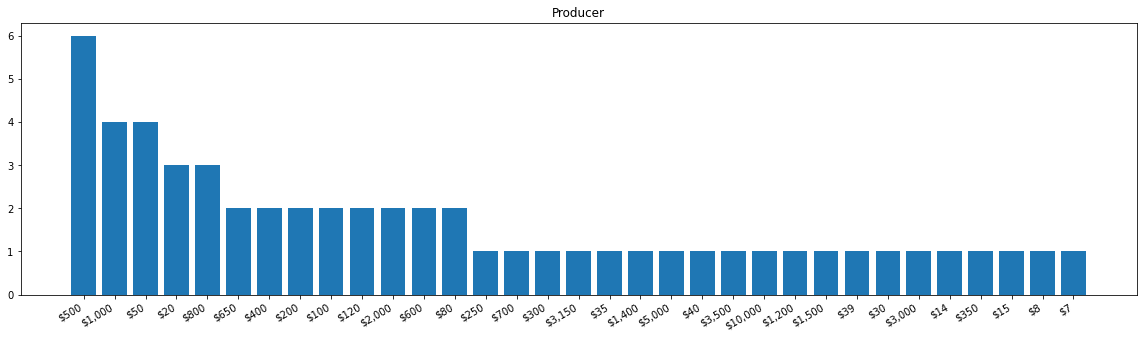

In [5]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.title("Producer")
plt.xticks(rotation=30, ha="right")
plt.show()



In [6]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [7]:
merge["CT"] = merge["CT"].str.strip()

In [8]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    224
Expert          146
Entry level      76
Name: CT, dtype: int64

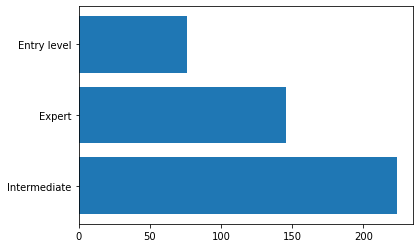

In [9]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [10]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [12]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [13]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [14]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

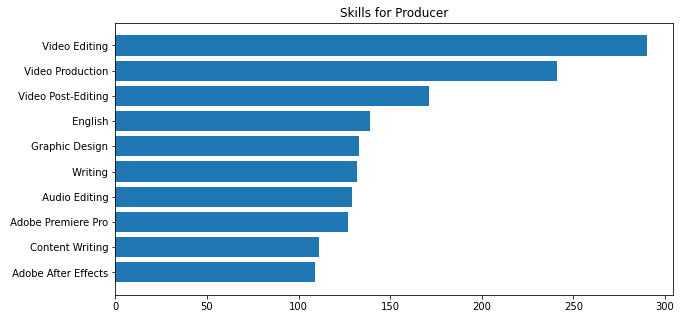

In [15]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
sort = count_skill.sort_values()
plt.figure(figsize=(10,5))
plt.title("Skills for Producer")
plt.barh(sort.index,sort.values)
plt.show()

In [16]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

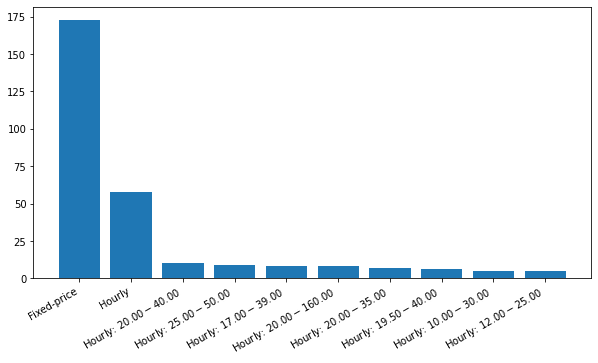

In [17]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


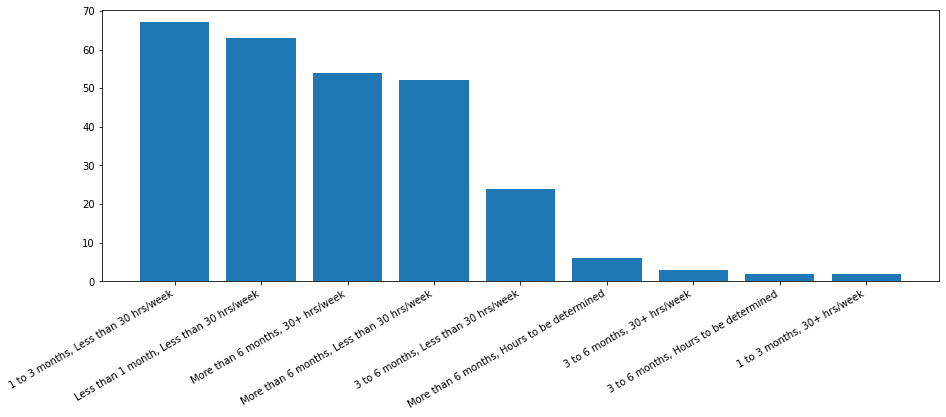

In [18]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

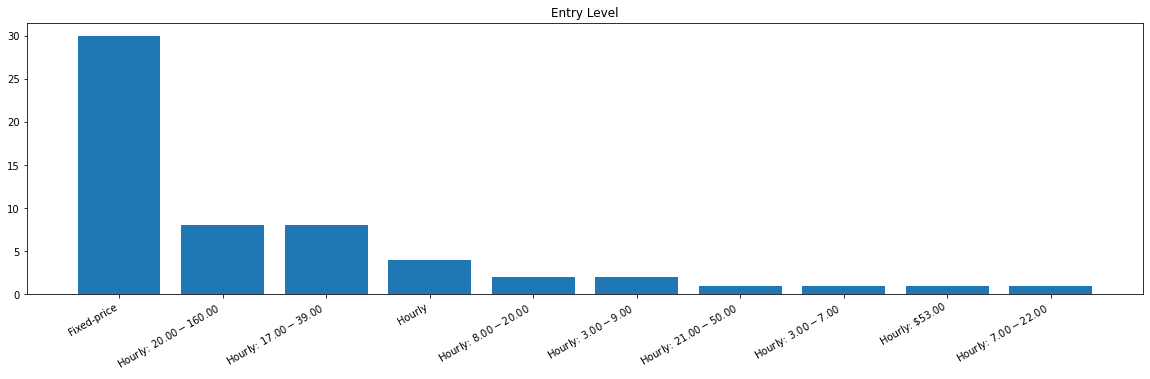

In [19]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


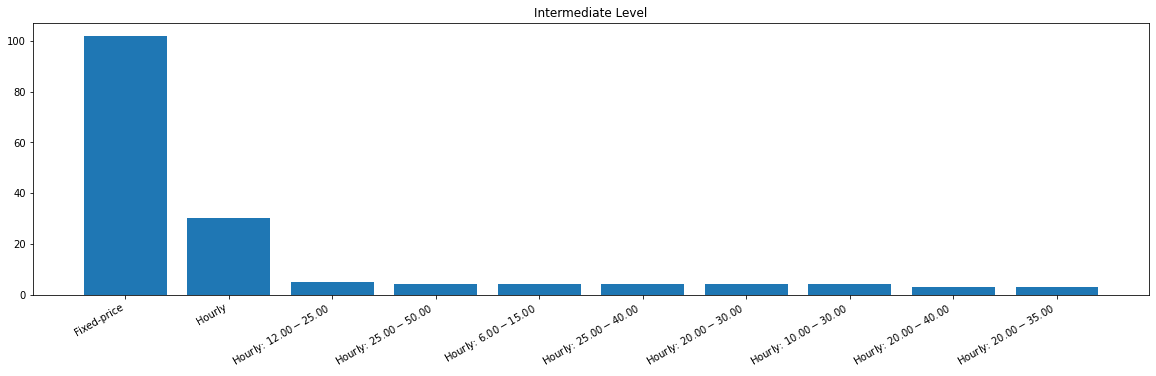

In [20]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

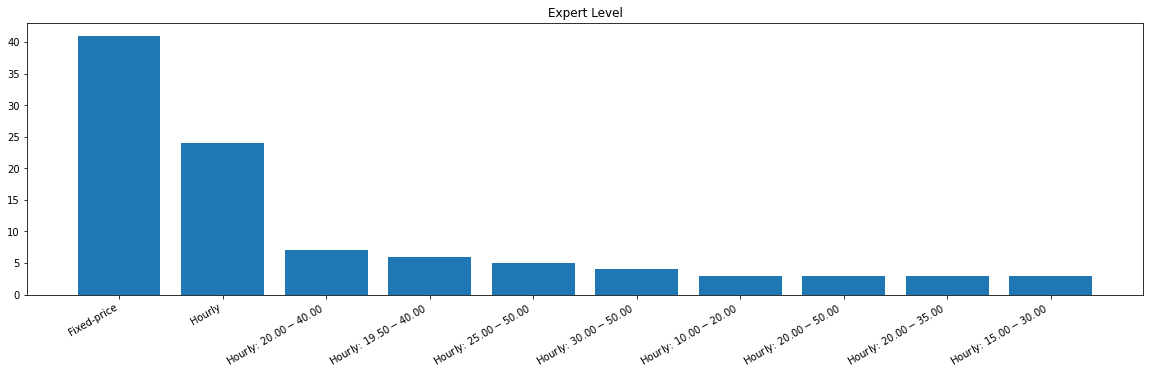

In [21]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

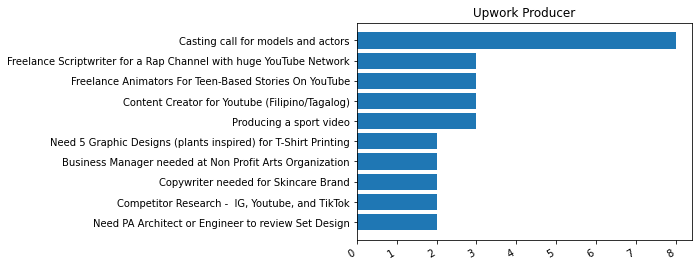

In [22]:
count_job_title = merge["Title"].value_counts()[0:10]
sort = count_job_title.sort_values()
plt.barh(sort.index, sort.values)
plt.title("Upwork Producer")
plt.xticks(rotation="30",ha="right")
plt.show()